<a href="https://colab.research.google.com/github/SaiChakresh/StudentFailurePrediction/blob/main/StudentFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

student academic success and dropout prediction using ml algorithms

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)


{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

In [ ]:
predict_students_dropout_and_academic_success.variables #Knowing about the variables


,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer #This helps in filling the missing values
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Exploratory data analysis

In [ ]:
X.head() #first 5 rows

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
X.tail() #last 5 rows

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,0,6,6,6,13.000000,0,12.7,3.7,-1.70


In [ ]:
X.isnull() #Checking weather there are any null values

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4420,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4421,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4422,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X.isnull().sum()

,0
Marital Status,0
Application mode,0
Application order,0
Course,0
Daytime/evening attendance,0
Previous qualification,0
Previous qualification (grade),0
Nacionality,0
Mother's qualification,0
Father's qualification,0


In [ ]:
X.shape #To know the shape of the data

(4424, 36)

In [ ]:
X_rows = X[X.duplicated()] #gives the duplicate rows
X_rows #There are no duplicate rows in this dataset

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP


In [ ]:
z = X
z1 = y
z

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
z1

,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [ ]:
#Label Encoding
z1['Target'] = z1['Target'].replace({'Graduate': 1, 'Dropout': 0,'Enrolled':1})

<ipython-input-13-34d49002c137>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z1['Target'] = z1['Target'].replace({'Graduate': 1, 'Dropout': 0,'Enrolled':1})
<ipython-input-13-34d49002c137>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z1['Target'] = z1['Target'].replace({'Graduate': 1, 'Dropout': 0,'Enrolled':1})


In [ ]:
z1['Target'].unique()

array([0, 1])

In [ ]:
z = pd.concat([z, z1], axis=1) # Concatenate DataFrames along columns (axis=1)

In [ ]:
z.corr()  #Calculate the correlation

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
Marital Status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.093712
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.198458
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.070485
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.033676
Daytime/evening attendance,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.080499
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.049379
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.078208
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.008346
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.064958
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.018295


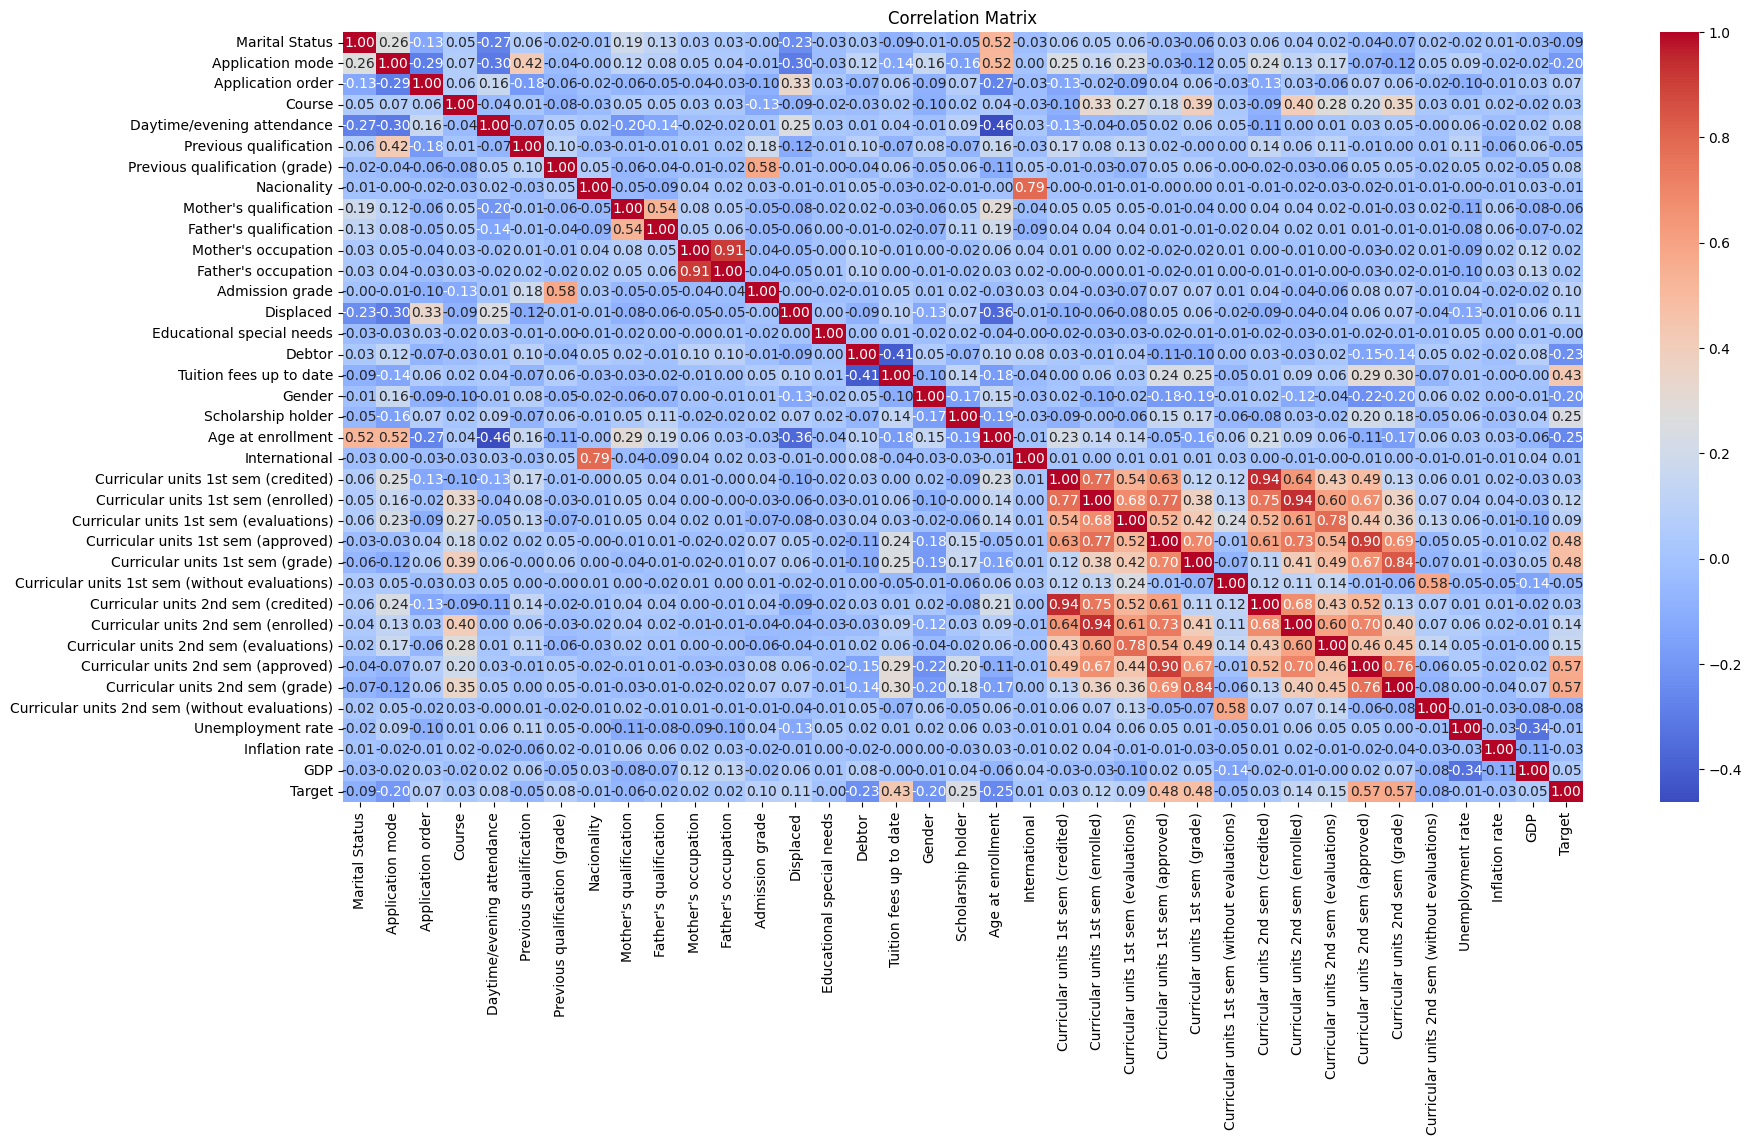

In [ ]:
# Calculate the correlation matrix
correlation_matrix = z.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Selecting all the required attributes
X = z.iloc[:,[4,7,15,16,20,21,22,23,24,25,27,28,29,30,31,34,35]]
X

,Daytime/evening attendance,Nacionality,Debtor,Tuition fees up to date,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Inflation rate,GDP
0,1,1,0,1,0,0,0,0,0,0.000000,0,0,0,0,0.000000,1.4,1.74
1,1,1,0,0,0,0,6,6,6,14.000000,0,6,6,6,13.666667,-0.3,0.79
2,1,1,0,0,0,0,6,0,0,0.000000,0,6,0,0,0.000000,1.4,1.74
3,1,1,0,1,0,0,6,8,6,13.428571,0,6,10,5,12.400000,-0.8,-3.12
4,0,1,0,1,0,0,6,9,5,12.333333,0,6,6,6,13.000000,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,0,1,0,0,6,7,5,13.600000,0,6,8,5,12.666667,2.8,-4.06
4420,1,105,1,0,1,0,6,6,6,12.000000,0,6,6,2,11.000000,0.6,2.02
4421,1,1,0,1,0,0,7,8,7,14.912500,0,8,9,1,13.500000,-0.3,0.79
4422,1,1,0,1,0,0,5,5,5,13.800000,0,5,6,5,12.000000,-0.8,-3.12


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42) #Splitting the testing and training data

In [ ]:
#Standard vector machine
svm = SVC()

In [ ]:
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:

svm_pred = svm.predict(X_test)

In [ ]:
accuracy_svm = accuracy_score(y_test, svm_pred)
accuracy_svm

0.8478915662650602

In [ ]:
classification_svm = classification_report(y_test, svm_pred)
print(classification_svm)

              precision    recall  f1-score   support

           0       0.89      0.62      0.73       441
           1       0.84      0.96      0.89       887

    accuracy                           0.85      1328
   macro avg       0.86      0.79      0.81      1328
weighted avg       0.85      0.85      0.84      1328



In [ ]:
#Random Forest
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
accuracy_rf = accuracy_score(y_test, rf_pred)
accuracy_rf

0.8682228915662651

In [ ]:
classification_rf = classification_report(y_test, rf_pred)
print(classification_rf)

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       441
           1       0.88      0.94      0.90       887

    accuracy                           0.87      1328
   macro avg       0.86      0.83      0.85      1328
weighted avg       0.87      0.87      0.87      1328



In [ ]:
#Decision Tree classifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
accuracy_dt = accuracy_score(y_test, dt_pred)
accuracy_dt

0.8049698795180723

In [ ]:
classification_dt = classification_report(y_test, dt_pred)
print(classification_dt)

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       441
           1       0.86      0.85      0.85       887

    accuracy                           0.80      1328
   macro avg       0.78      0.78      0.78      1328
weighted avg       0.81      0.80      0.81      1328



In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, knn_pred)
accuracy_knn

0.8283132530120482

In [ ]:
classsification_knn = classification_report(y_test, knn_pred)
print(classsification_knn)

              precision    recall  f1-score   support

           0       0.80      0.64      0.71       441
           1       0.84      0.92      0.88       887

    accuracy                           0.83      1328
   macro avg       0.82      0.78      0.80      1328
weighted avg       0.83      0.83      0.82      1328



['Daytime/evening attendance', 'Nacionality', 'Debtor', 'Tuition fees up to date', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Inflation rate', 'GDP']

**Graduate:1**

**Dropout:0**

In [ ]:
predicit=[0,1,0,1,0,0,5,9,5,12.333333,0,6,6,6,13.000000,-0.3,0.79]
prediction=rf.predict([predicit])
prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])